<a href="https://colab.research.google.com/github/rahgirrafi/Machine_learning_course/blob/main/Supervised_Machine_Learning_regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="toc_40291_2.1"></a>
#### Cost Function
Model:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

The cost function:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 


The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
x = np.array([1,2,3,4,5,6,7,8])
y= np.array([10,8,12,11,16,13,15,17])
w=1
b=1

In [129]:
def cost_function(x:np.array, y:np.array, w:float, b:float):
  m  = x.shape[0]
  j_wb = 0
  cost = 0
  for i in range(m):
    f_wb = w*x[i] +b
    cost_temp = (f_wb - y[i])**2
    cost += cost_temp
  return cost/(2*m)

cost_function(x,y,w,b)

27.375

In [130]:
def gradient(x:np.array, y:np.array, w:float, b:float):
  m = x.shape[0]
  j_wb = 0
  dj_dw_sum_holder = 0
  dj_db_sum_holder = 0

  for i in range(m):
    f_wb = w*x[i] +b
    dj_dw_temp = (f_wb - y[i])*x[i]
    dj_db_temp = (f_wb - y[i]) 
    dj_dw_sum_holder += dj_dw_temp
    dj_db_sum_holder += dj_db_temp

  dj_dw =  dj_dw_sum_holder / m
  dj_db =  dj_db_sum_holder / m

  return dj_dw, dj_db




In [136]:
def gradient_descent(x:np.array, y:np.array, w:float, b:float, a, n, gradient ):
  for i in range(n):
    dj_dw, dj_db = gradient(x,y,w,b)
    w_temp = w - a* dj_dw
    b_temp = b - a* dj_db
    w= w_temp
    b= b_temp
  return w, b

w,b = gradient_descent(x, y, w, b, 0.01, 1000, gradient)

print(w,b)

1.0952918476031155 7.821126359110908


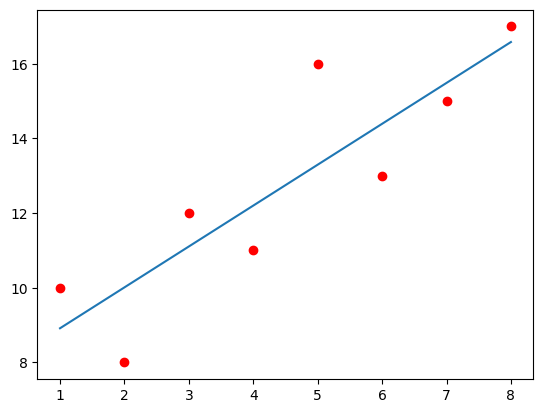

In [137]:
plt.scatter(x,y,c = 'r')
y2 = w*x +b
plt.plot(x,y2)
plt.show()